### This imports tracking data from ostrich and copares it to data from simulation

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as si

In [18]:
data_dict = {}
velocity_dict={}
for i in range(0, 31, 10):
    file_path = rf"E:\Arizona State University\Fall 24\RAS 557\project_2\leg_{i}g.csv"
    track_data = pd.read_csv(file_path, sep=',')
    t = track_data.t.to_numpy()
    xy = np.array([track_data.xA, track_data.yA, track_data.xB, track_data.yB, track_data.xC, track_data.yC]).T
    indices = t <= 10
    t = t[indices]
    xy = xy[indices]
    data_dict[f"leg_{i}g"] = np.vstack((t, xy.T)).T
    
velocity_dict


{}

In [20]:
sim_data_dict = {}
velocity_dict={}
sim_file_path = rf"E:\Arizona State University\Fall 24\RAS 557\project_2\ostrich_position_data_sim_0g.csv"
sim_data = pd.read_csv(sim_file_path, sep=',')
sim_t = sim_data.t.to_numpy()
sim_xy = np.array([sim_data.xA, sim_data.yA, sim_data.xB, sim_data.yB, sim_data.xC, sim_data.yC]).T
indices = sim_t <= 10
sim_t = sim_t[indices]
sim_xy = sim_xy[indices]
sim_data_dict["sim_data"] = np.vstack((sim_t, sim_xy.T)).T
    

In [21]:
leg_0g_data = data_dict["leg_0g"]
leg_0g_data = data_dict["leg_10g"]
leg_20g_data = data_dict["leg_20g"]
leg_30g_data = data_dict["leg_30g"]
sim_leg0g = sim_data_dict["sim_data"]

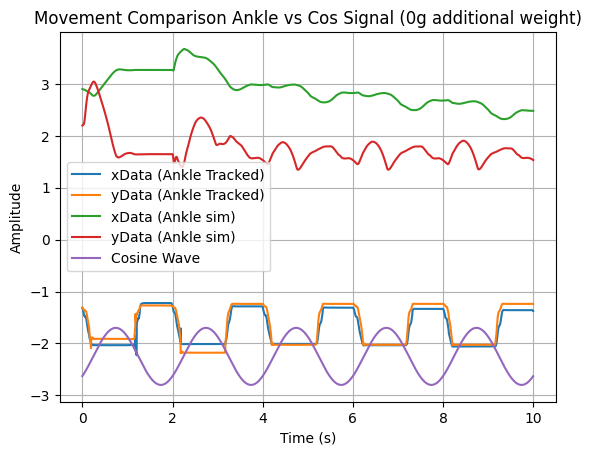

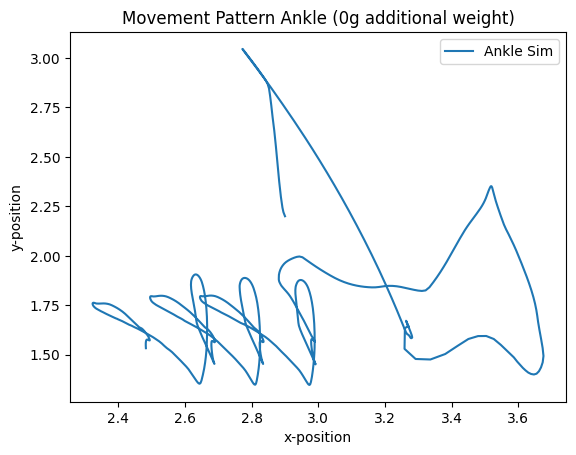

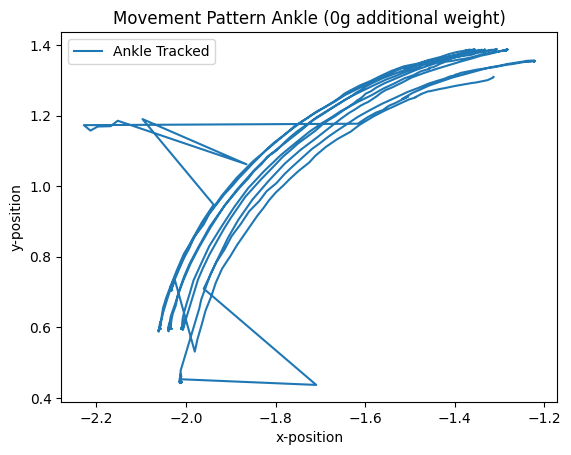

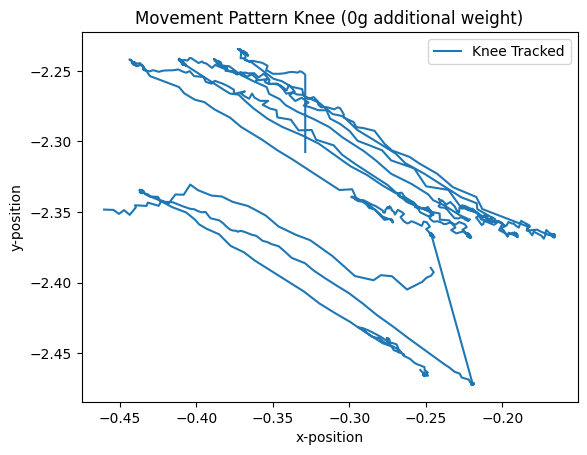

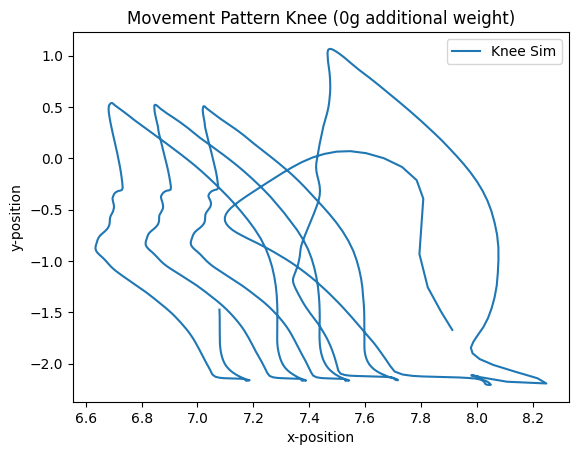

Velocity of the manifcatured configuration 0g is 0.603765 inches/min
Velocity of the simulated configuration 0g is 0.8115001824000001 inches/min


In [26]:
# Plot 1: Ankle vs Cosine Wave
f = 0.5  # Frequency
w = 2 * np.pi * f  # Angular frequency
phase_off = 60.5
y = np.cos(w * t + phase_off) * 0.55 - 2.25

plt.figure()
plt.plot(leg_0g_data[:, 0], leg_0g_data[:, 1], label='xData (Ankle Tracked)')
plt.plot(leg_0g_data[:, 0], leg_0g_data[:, 2] +(leg_0g_data[0, 1]-leg_0g_data[0, 2] ), label='yData (Ankle Tracked)')
plt.plot(sim_leg0g[:, 0], sim_leg0g[:, 1], label='xData (Ankle sim)')
plt.plot(sim_leg0g[:, 0], sim_leg0g[:, 2] , label='yData (Ankle sim)')

plt.plot(t, y, label='Cosine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Movement Comparison Ankle vs Cos Signal (0g additional weight)')
plt.grid(True)
plt.legend()
plt.show()

# Plot 3: Movement Pattern Ankle
plt.figure()
plt.title(f'Movement Pattern Ankle (0g additional weight)')
plt.plot(sim_leg0g[:, 1], sim_leg0g[:, 2] , label='Ankle Sim')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend()
plt.show()

plt.figure()
plt.title(f'Movement Pattern Ankle (0g additional weight)')
plt.plot(leg_0g_data[:, 1], leg_0g_data[:, 2] , label='Ankle Tracked')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend()
plt.show()


# Plot 4: Movement Pattern Knee
plt.figure()
plt.title(f'Movement Pattern Knee (0g additional weight)')
plt.plot(leg_0g_data[:, 5], leg_0g_data[:, 6] - 4, label='Knee Tracked')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend()
plt.show()

# Plot 4: Movement Pattern Knee
plt.figure()
plt.title(f'Movement Pattern Knee (0g additional weight)')
plt.plot(sim_leg0g[:, 5], sim_leg0g[:, 6] - 4, label='Knee Sim')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend()
plt.show()

vel_tracked_0g = (np.max(leg_0g_data[:, 1]) - np.min(leg_0g_data[:, 1])) / (10/6)

vel_sim_0g = (np.max(sim_leg0g[:, 1]) - np.min(sim_leg0g[:, 1])) / (10/6)
    # Print the result
print(f"Velocity of the manifcatured configuration 0g is {vel_tracked_0g} inches/min")
print(f"Velocity of the simulated configuration 0g is {vel_sim_0g} inches/min")



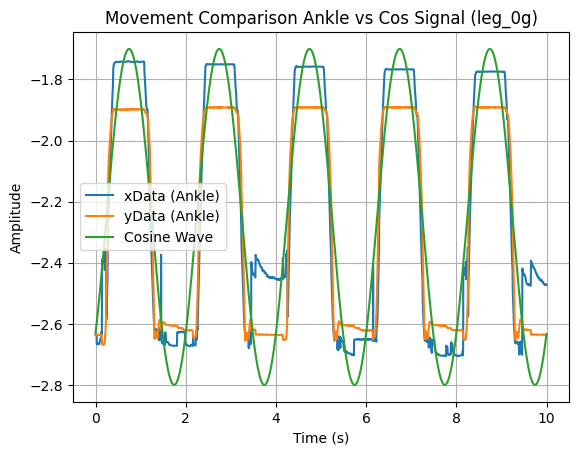

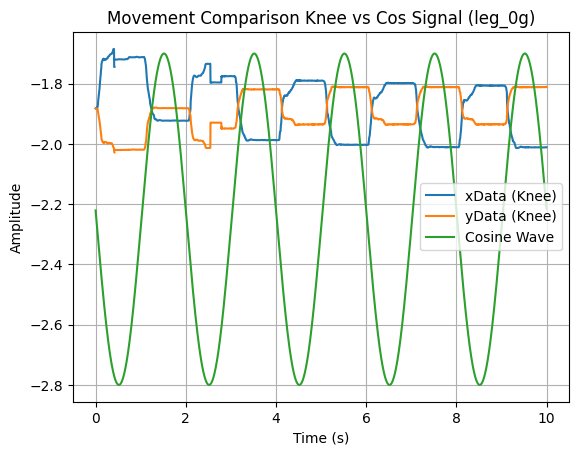

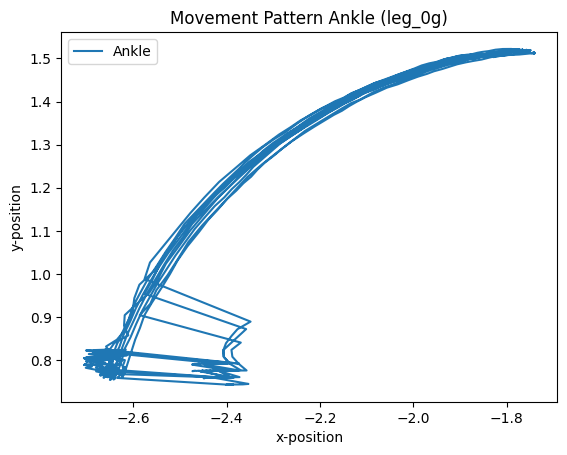

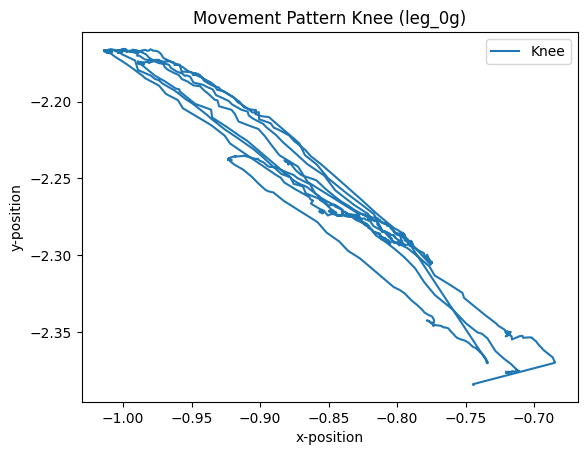

Velocity of the configuration leg_0g is 0.5795891999999999 inches/min


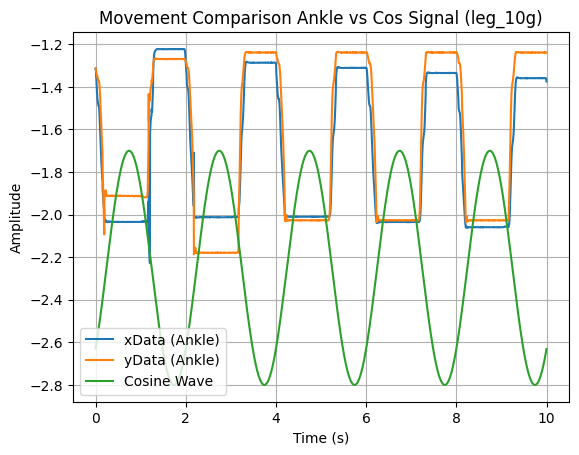

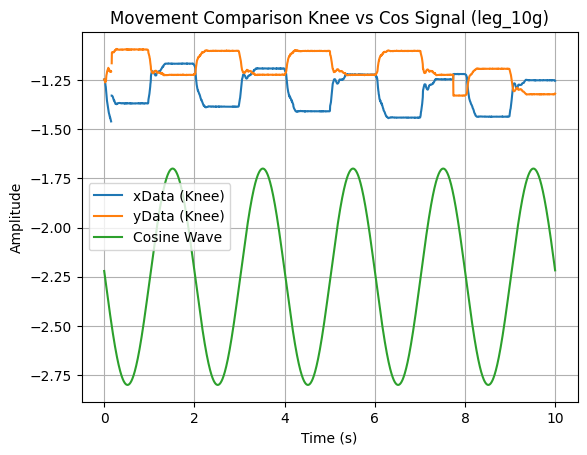

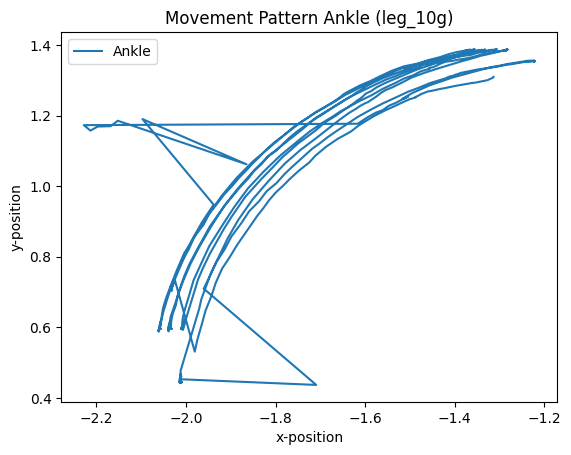

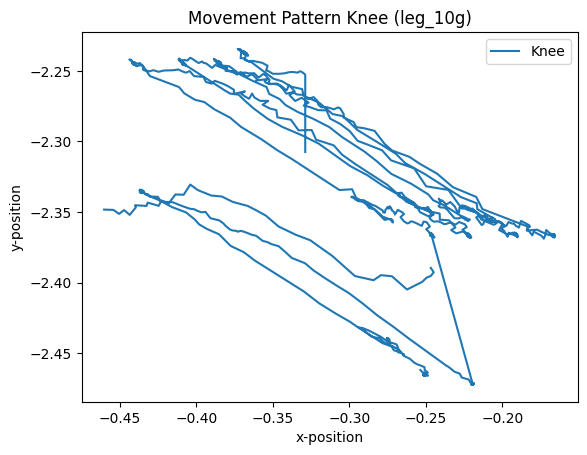

Velocity of the configuration leg_10g is 0.603765 inches/min


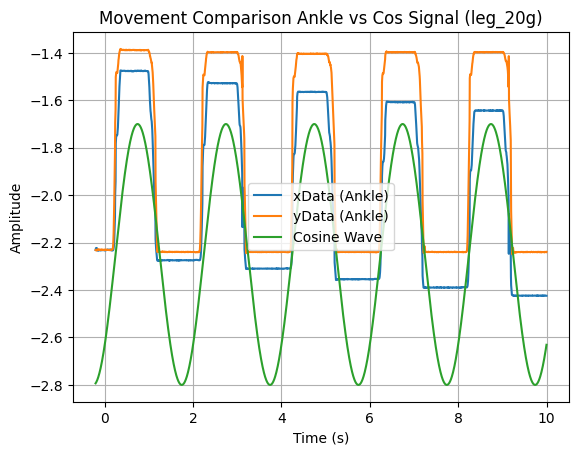

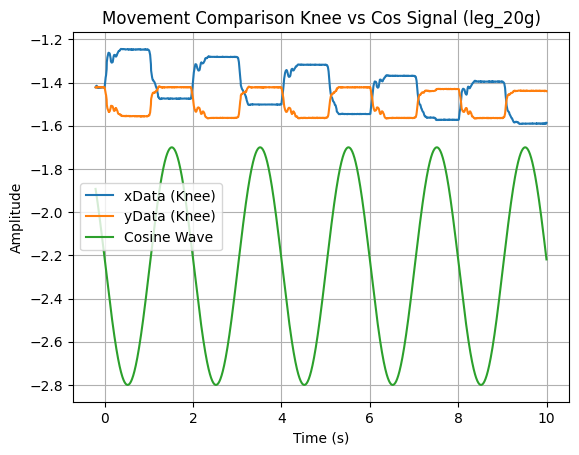

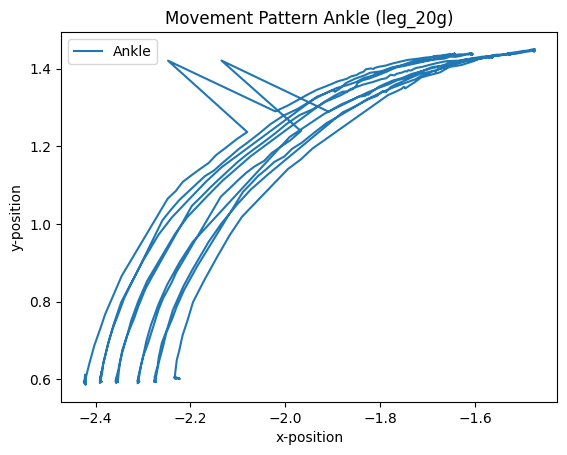

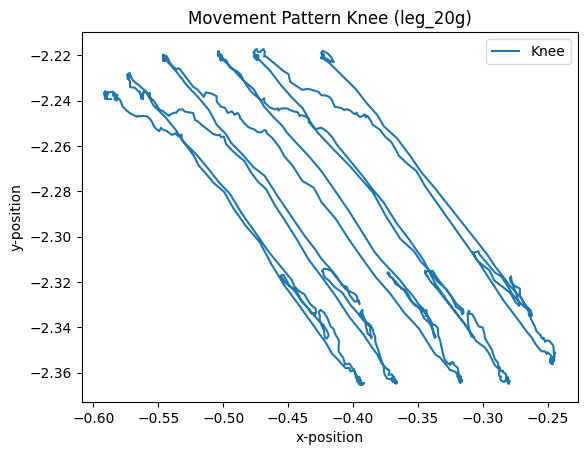

Velocity of the configuration leg_20g is 0.57039 inches/min


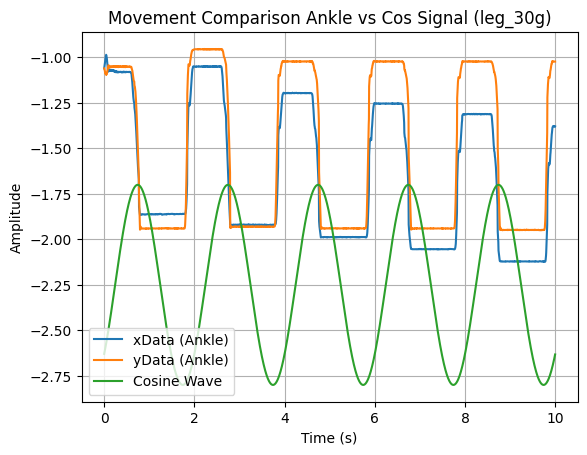

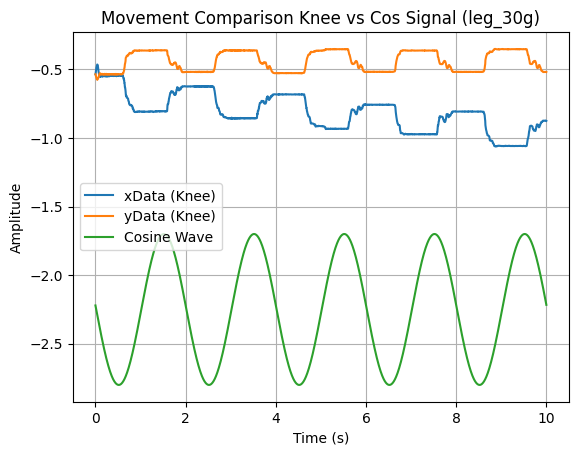

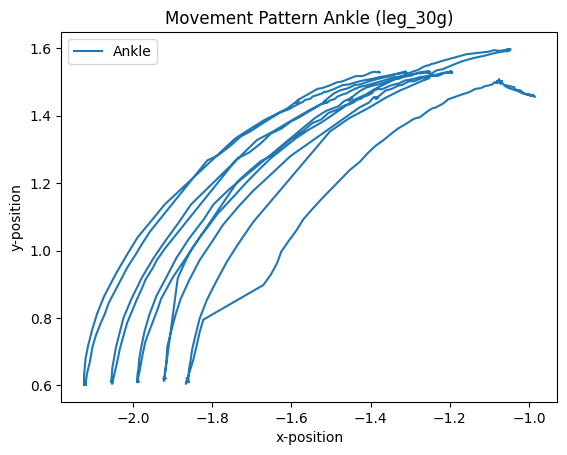

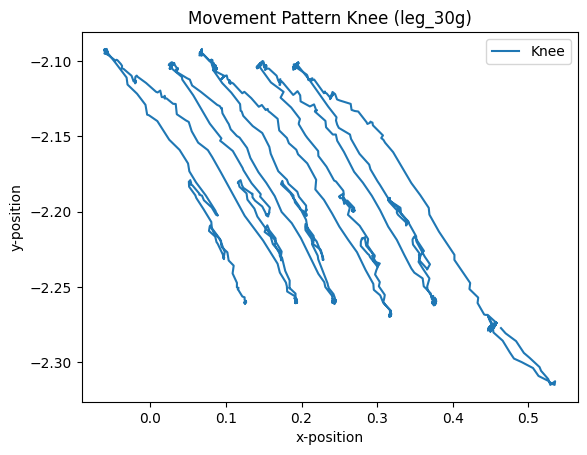

Velocity of the configuration leg_30g is 0.6830537999999999 inches/min


In [11]:
for leg, data in data_dict.items():
    t = data[:, 0]

    # Plot 1: Ankle vs Cosine Wave
    f = 0.5  # Frequency
    w = 2 * np.pi * f  # Angular frequency
    phase_off = 60.5
    y = np.cos(w * t + phase_off) * 0.55 - 2.25

    plt.figure()
    plt.plot(data[:, 0], data[:, 1], label='xData (Ankle)')
    plt.plot(data[:, 0], data[:, 2] +(data[0, 1]-data[0, 2] ), label='yData (Ankle)')
    plt.plot(t, y, label='Cosine Wave')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Movement Comparison Ankle vs Cos Signal ({leg})')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot 2: Knee vs Cosine Wave
    phase_off = 45.5
    y = np.cos(w * t + phase_off) * 0.55 - 2.25

    plt.figure()
    plt.plot(data[:, 0], data[:, 5] - 1, label='xData (Knee)')
    plt.plot(data[:, 0], data[:, 6] -1+ (data[0, 5]-data[0, 6]), label='yData (Knee)')
    plt.plot(t, y, label='Cosine Wave')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Movement Comparison Knee vs Cos Signal ({leg})')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot 3: Movement Pattern Ankle
    plt.figure()
    plt.title(f'Movement Pattern Ankle ({leg})')
    plt.plot(data[:, 1], data[:, 2] , label='Ankle')
    plt.xlabel('x-position')
    plt.ylabel('y-position')
    plt.legend()
    plt.show()

    # Plot 4: Movement Pattern Knee
    plt.figure()
    plt.title(f'Movement Pattern Knee ({leg})')
    plt.plot(data[:, 5], data[:, 6] - 4, label='Knee')
    plt.xlabel('x-position')
    plt.ylabel('y-position')
    plt.legend()
    plt.show()
    
    vel_config = (np.max(data[:, 1]) - np.min(data[:, 1])) / (10/6)
    velocity_dict[leg] = vel_config


    # Print the result
    print(f"Velocity of the configuration {leg} is {vel_config} inches/min")

In [5]:
# Velocity dictionary to store calculated velocities
velocity_dict = {}

# Iterate over each dataset in the data_dict
for leg, data in data_dict.items():
    # Calculate velocity configuration in inches/min
    vel_config = (np.max(data[:, 1]) - np.min(data[:, 1])) / (10 / 6)  # Assuming 10 seconds = 10/6 minutes
    velocity_dict[leg] = vel_config

    # Print the result
    print(f"Velocity of the configuration {leg} is {vel_config:.2f} inches/min")



Velocity of the configuration leg_0g is 0.58 inches/min
Velocity of the configuration leg_10g is 0.60 inches/min
Velocity of the configuration leg_20g is 0.57 inches/min
Velocity of the configuration leg_30g is 0.68 inches/min
